<a href="https://colab.research.google.com/github/kjm90110/course-manage-program/blob/master/3_GBM(Gradient_Boosting_Machine).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GBM (Gradient Boosting Machine)**

## 📖 1. 개요
GBM(Gradient Boosting Machine)은 Friedman이 2001년에 제안한 **순차적 앙상블 학습 기법**입니다. 약한 학습기(보통 결정 트리)를 **순차적으로 학습하여 이전 모델의 오류를 다음 모델이 보정**하는 방식으로 강력한 예측 모델을 만듭니다.

#### 주요 특징

- 🔄 순차적 학습: 이전 모델의 잔차(residual)를 다음 모델이 학습
- 📊 우수한 성능: 회귀와 분류 모두에 우수한 성능
- 🎯 그래디언트 기반: 손실 함수의 음의 그래디언트 방향으로 학습
- 🛡️ 정규화 지원: 학습률과 트리 깊이로 과적합 방지
- 📈 특성 중요도: 각 특성의 중요도 계산 가능
- ⚙️ 유연성: 다양한 손실 함수 지원

####사용 사례

- 회귀 문제 (집값 예측, 판매량 예측)
- 분류 문제 (이탈 예측, 신용 평가)
- 순위 문제 (검색 결과 순위)
- 생존 분석

## 2. 핵심 원리
### GBM 알고리즘 동작 방식

```
입력: 훈련 데이터 {(xᵢ, yᵢ)}, 반복 횟수 M, 손실함수 L

1단계: 초기 모델 구축
   F₀(x) = argmin_γ Σ L(yᵢ, γ)
   
2단계: m = 1 to M 반복
   a) 의사 잔차(Pseudo-residual) 계산
      rₘᵢ = -∂L(yᵢ, F_{m-1}(xᵢ))/∂F_{m-1}(xᵢ)
   
   b) 잔차를 예측하는 기본 학습기 학습
      hₘ = fit_learner(X, r)
   
   c) 최적의 스텝 크기 계산
      γₘ = argmin_γ Σ L(yᵢ, F_{m-1}(xᵢ) + γhₘ(xᵢ))
   
   d) 모델 업데이트
      Fₘ(x) = F_{m-1}(x) + learning_rate × γₘ × hₘ(x)

3단계: 최종 예측
   F(x) = F₀(x) + Σ(learning_rate × γₘ × hₘ(x))
```

#### **잔차(Residual)의 개념**

```
원본 데이터:
y = [3.0, 5.2, 4.8, 6.1, 2.9]

첫 번째 모델의 예측:
ŷ₁ = [3.5, 4.9, 5.0, 5.8, 3.2]

잔차 (다음 모델이 학습할 오류):
r = y - ŷ₁ = [-0.5, 0.3, -0.2, 0.3, -0.3]

두 번째 모델은 이 잔차를 예측하도록 학습!
```

#### **손실 함수 (Loss Function)**

```
회귀 문제:
- 제곱 손실 (Squared Loss): L(y, ŷ) = (y - ŷ)²
- 절대값 손실 (Absolute Loss): L(y, ŷ) = |y - ŷ|

분류 문제:
- Log Loss (Binary): L(y, ŷ) = -[y·log(ŷ) + (1-y)·log(1-ŷ)]
- Multinomial Log Loss (Multi-class)

기타:
- Huber Loss, Quantile Loss 등
```

#### **그래디언트 부스팅 vs 배깅**

```
배깅 (Bagging):
  - 병렬로 독립적인 모델 학습
  - 각 모델의 예측을 평균
  - 분산 감소

그래디언트 부스팅 (Gradient Boosting):
  - 순차적으로 모델 학습
  - 이전 모델의 오류를 다음 모델이 보정
  - 편향과 분산 모두 감소
```

### 3. 장점과 단점
✅ 장점

- 우수한 성능: 많은 실제 문제에서 최고 수준의 성능
- 유연한 손실 함수: 다양한 손실 함수 지원
- 특성 중요도: 각 특성의 중요도를 명확히 파악
- 결측치 처리: 자동으로 결측치 처리 가능
- 정규화 기능: 학습률, 트리 깊이로 과적합 방지
- 순차적 개선: 각 단계에서 모델이 점진적으로 개선
- 해석 가능: 부분 의존성 그래프로 특성-예측값 관계 분석

❌ 단점

- 느린 학습 속도: 순차적 학습으로 병렬화가 어려움
- 많은 하이퍼파라미터: 튜닝해야 할 파라미터가 많음
- 과적합 위험: 잘못된 파라미터로 과적합 가능
- 계산 복잡도: 대용량 데이터에서는 시간 소요
- 메모리 사용: 중간 결과를 저장해야 해서 메모리 필요
- 수렴 느림: 작은 학습률 사용 시 많은 반복 필요

## 💻 4. Google Colab 실습 코드

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

print(f"📊 Iris 데이터셋 정보:")
print(f"  - 샘플 수: {X.shape[0]}")
print(f"  - 특성 수: {X.shape[1]}")
print(f"  - 클래스 수: {len(np.unique(y))}")
print(f"  - 클래스 이름: {iris.target_names}")
print(f"  - 클래스 분포: {np.bincount(y)}")

📊 Iris 데이터셋 정보:
  - 샘플 수: 150
  - 특성 수: 4
  - 클래스 수: 3
  - 클래스 이름: ['setosa' 'versicolor' 'virginica']
  - 클래스 분포: [50 50 50]


In [ ]:
# 데이터 분할 (8:2) - stratify=y로 클래스 비율 유지
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
print(f"\n✅ 데이터 분할 완료:")
print(f"  - 훈련 데이터: {X_train.shape[0]} 샘플")
print(f"  - 테스트 데이터: {X_test.shape[0]} 샘플")
print(f"  - 훈련 세트 클래스 분포: {np.bincount(y_train)}")
print(f"  - 테스트 세트 클래스 분포: {np.bincount(y_test)}")



✅ 데이터 분할 완료:
  - 훈련 데이터: 120 샘플
  - 테스트 데이터: 30 샘플
  - 훈련 세트 클래스 분포: [40 40 40]
  - 테스트 세트 클래스 분포: [10 10 10]


In [ ]:
df = pd.DataFrame(X_train, columns=iris.feature_names)
print(f"\n📈 훈련 데이터 기본 통계:")
print(df.describe())


📈 훈련 데이터 기본 통계:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         120.000000        120.000000          120.00000   
mean            5.841667          3.048333            3.77000   
std             0.840926          0.448524            1.76852   
min             4.300000          2.000000            1.10000   
25%             5.100000          2.800000            1.60000   
50%             5.750000          3.000000            4.25000   
75%             6.400000          3.325000            5.10000   
max             7.900000          4.400000            6.90000   

       petal width (cm)  
count        120.000000  
mean           1.205000  
std            0.762663  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [ ]:
# GBM 분류 모델 생성
print("🔄 GBM 모델 생성 중...")

gbm_model = GradientBoostingClassifier(
    # 손실 함수 및 학습 관련
    loss='log_loss',                # 로그 손실 (분류용)
    learning_rate=0.1,              # 학습률 (낮을수록 느리지만 정확)
    n_estimators=200,               # 부스팅 라운드

    # 트리 구조 관련
    max_depth=5,                    # 최대 깊이
    min_samples_split=5,            # 노드 분할 최소 샘플 수
    min_samples_leaf=2,             # 리프 최소 샘플 수
    max_features='sqrt',            # 특성 샘플링 방법

    # 정규화 관련
    subsample=0.8,                  # 각 트리 학습 시 샘플 비율

    # 검증 관련
    validation_fraction=0.1,        # 검증 데이터 비율
    n_iter_no_change=10,            # 조기 종료 라운드

    # 기타
    random_state=42,
    verbose=0
)

print('생성 완료!')

🔄 GBM 모델 생성 중...
생성 완료!


In [ ]:
# 모델 학습
print("🔄 GBM 모델 학습 중...")
gbm_model.fit(X_train, y_train)

print("✅ 학습 완료!")

🔄 GBM 모델 학습 중...
✅ 학습 완료!


In [ ]:
# 예측
y_pred_train = gbm_model.predict(X_train)
y_pred_test = gbm_model.predict(X_test)

In [ ]:
# 성능 지표 계산 (다중 분류이므로 average='weighted')
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')

In [ ]:
print("=" * 60)
print("📊 GBM 모델 성능 평가 (Iris 데이터셋)")
print("=" * 60)

print(f"\n정확도 (Accuracy):")
print(f"  - 훈련 데이터: {train_accuracy:.4f}")
print(f"  - 테스트 데이터: {test_accuracy:.4f}")

print(f"\n테스트 데이터 상세 평가:")
print(f"  - 정밀도 (Precision): {test_precision:.4f}")
print(f"  - 재현율 (Recall): {test_recall:.4f}")
print(f"  - F1-Score: {test_f1:.4f}")

print(f"\n분류 리포트:")
print(classification_report(y_test, y_pred_test,
                          target_names=iris.target_names))

📊 GBM 모델 성능 평가 (Iris 데이터셋)

정확도 (Accuracy):
  - 훈련 데이터: 1.0000
  - 테스트 데이터: 0.9333

테스트 데이터 상세 평가:
  - 정밀도 (Precision): 0.9333
  - 재현율 (Recall): 0.9333
  - F1-Score: 0.9333

분류 리포트:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [ ]:
# 혼동 행렬
cm = confusion_matrix(y_test, y_pred_test)
print(f"\n혼동 행렬:")
print(cm)


혼동 행렬:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


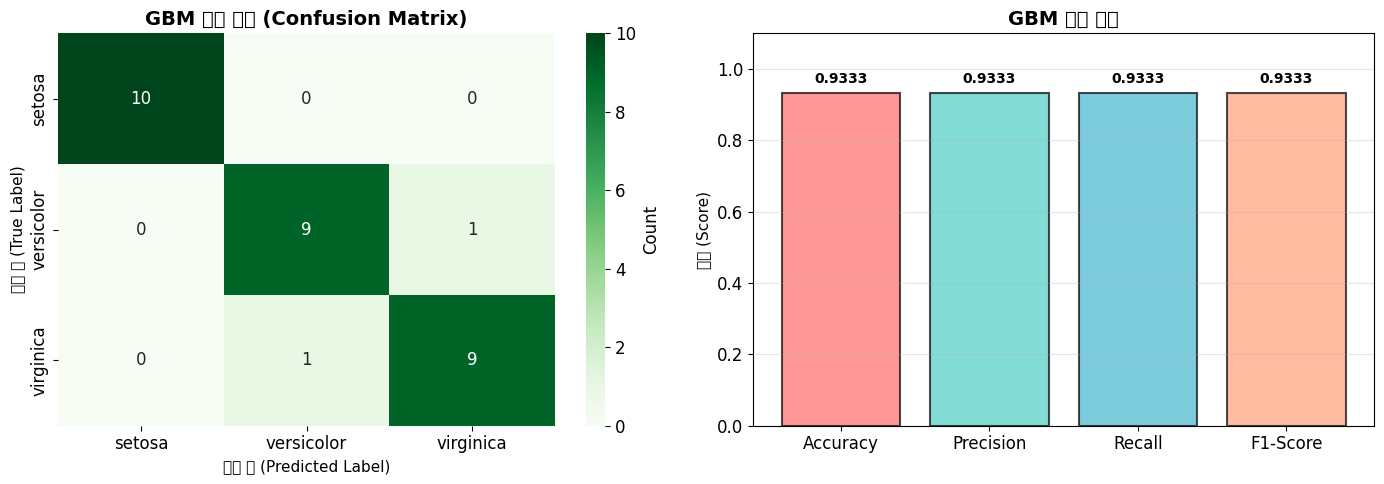

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. 혼동 행렬
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names,
            ax=axes[0],
            cbar_kws={'label': 'Count'})
axes[0].set_title('GBM 혼동 행렬 (Confusion Matrix)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('실제 값 (True Label)', fontsize=11)
axes[0].set_xlabel('예측 값 (Predicted Label)', fontsize=11)

# 2. 성능 지표 비교
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [test_accuracy, test_precision, test_recall, test_f1]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

bars = axes[1].bar(metrics, values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('점수 (Score)', fontsize=11)
axes[1].set_title('GBM 성능 지표', fontsize=14, fontweight='bold')
axes[1].set_ylim([0, 1.1])
axes[1].grid(axis='y', alpha=0.3)

# 값 표시
for bar, val in zip(bars, values):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{val:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

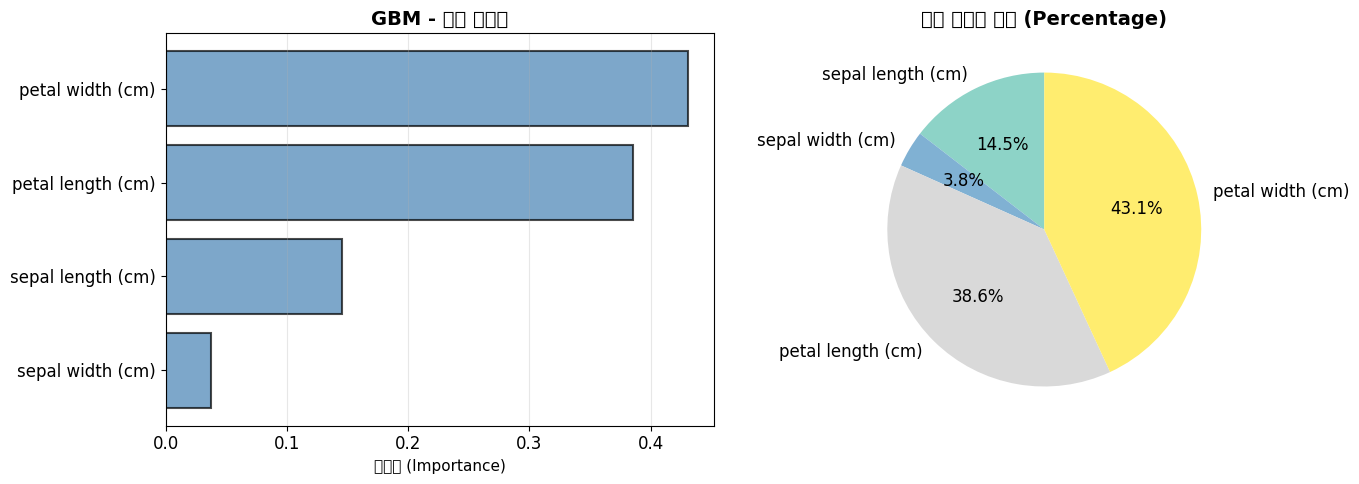


🔝 특성 중요도 순위:
  1. petal width (cm)              : 0.4311
  2. petal length (cm)             : 0.3859
  3. sepal length (cm)             : 0.1454
  4. sepal width (cm)              : 0.0376


In [ ]:
# GBM의 특성 중요도
feature_importance = gbm_model.feature_importances_
feature_names = iris.feature_names

# 특성 중요도 정렬
sorted_indices = np.argsort(feature_importance)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. 수평 막대 그래프
axes[0].barh(range(len(feature_names)), feature_importance[sorted_indices],
            color='steelblue', alpha=0.7, edgecolor='black', linewidth=1.5)
axes[0].set_yticks(range(len(feature_names)))
axes[0].set_yticklabels([feature_names[i] for i in sorted_indices])
axes[0].set_xlabel('중요도 (Importance)', fontsize=11)
axes[0].set_title('GBM - 특성 중요도', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# 2. 원형 그래프
colors = plt.cm.Set3(np.linspace(0, 1, len(feature_names)))
axes[1].pie(feature_importance, labels=feature_names, autopct='%1.1f%%',
           colors=colors, startangle=90)
axes[1].set_title('특성 중요도 비율 (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n🔝 특성 중요도 순위:")
for rank, idx in enumerate(sorted_indices[::-1], 1):
    print(f"  {rank}. {feature_names[idx]:30s}: {feature_importance[idx]:.4f}")

🔄 검증 점수 계산 중...


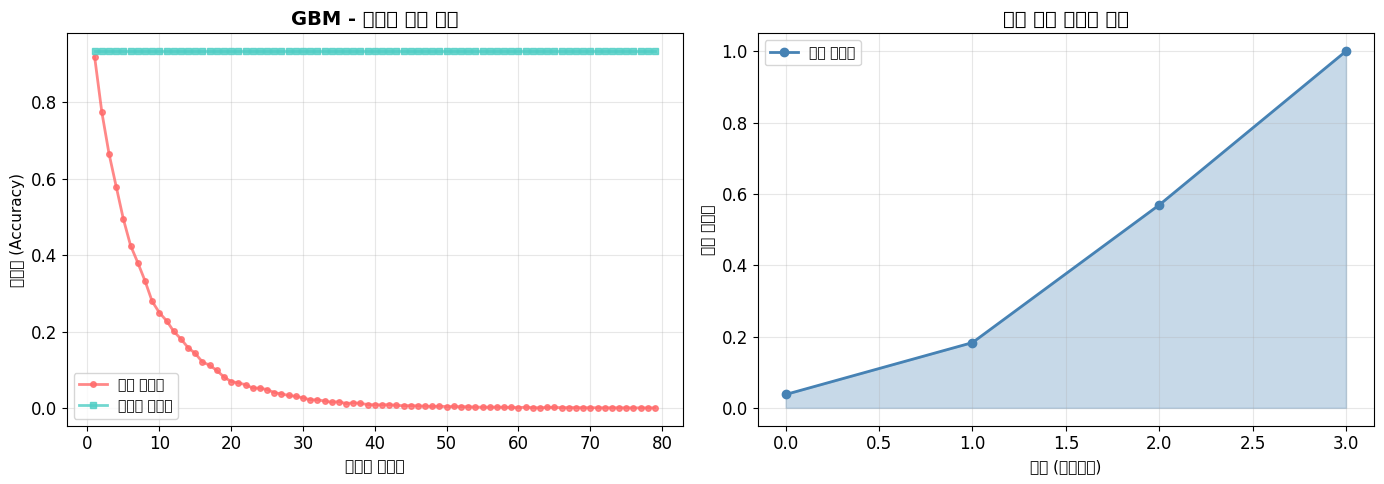

✅ 학습 곡선 분석 완료!
  - 초기 훈련 정확도: 0.9176
  - 최종 훈련 정확도: 0.0005
  - 초기 테스트 정확도: 0.9333
  - 최종 테스트 정확도: 0.9333


In [ ]:
# 부스팅 단계에 따른 훈련 및 검증 점수 추적
train_scores = gbm_model.train_score_
test_scores = []

print("🔄 검증 점수 계산 중...")

# 각 단계별 검증 점수 계산
for i in range(1, len(gbm_model.estimators_) + 1):
    # i번째 단계까지의 누적 예측
    pred = gbm_model.predict(X_test)
    score = accuracy_score(y_test, pred)
    test_scores.append(score)

# 학습 곡선 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. 부스팅 진행에 따른 정확도 변화
iterations = range(1, len(train_scores) + 1)
axes[0].plot(iterations, train_scores, marker='o', label='훈련 정확도',
            linewidth=2, markersize=4, alpha=0.8, color='#FF6B6B')
axes[0].plot(iterations, test_scores, marker='s', label='테스트 정확도',
            linewidth=2, markersize=4, alpha=0.8, color='#4ECDC4')
axes[0].set_xlabel('부스팅 라운드', fontsize=11)
axes[0].set_ylabel('정확도 (Accuracy)', fontsize=11)
axes[0].set_title('GBM - 부스팅 진행 과정', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# 2. 손실 값 변화
# feature_importances를 통해 간접적으로 학습 진행 상황 표시
cumulative_importance = np.cumsum(feature_importance[np.argsort(feature_importance)])
normalized_importance = cumulative_importance / cumulative_importance[-1]

axes[1].fill_between(range(len(normalized_importance)), normalized_importance,
                     alpha=0.3, color='steelblue')
axes[1].plot(range(len(normalized_importance)), normalized_importance,
            marker='o', linewidth=2, color='steelblue', label='누적 중요도')
axes[1].set_xlabel('특성 (오름차순)', fontsize=11)
axes[1].set_ylabel('누적 중요도', fontsize=11)
axes[1].set_title('특성 누적 중요도 분포', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ 학습 곡선 분석 완료!")
print(f"  - 초기 훈련 정확도: {train_scores[0]:.4f}")
print(f"  - 최종 훈련 정확도: {train_scores[-1]:.4f}")
print(f"  - 초기 테스트 정확도: {test_scores[0]:.4f}")
print(f"  - 최종 테스트 정확도: {test_scores[-1]:.4f}")

🔄 다양한 learning_rate 파라미터 분석 중...


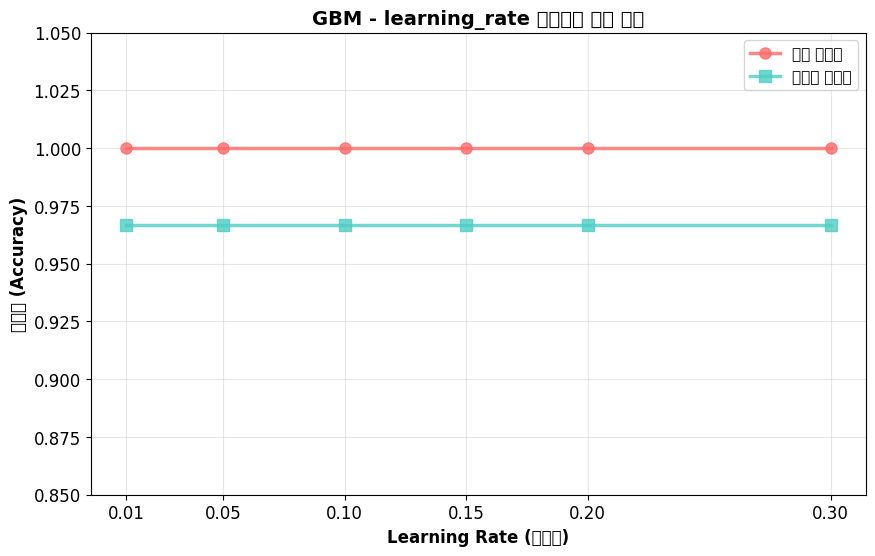

✅ 분석 완료!

📊 learning_rate 결과:
  learning_rate=0.01: 훈련=1.0000, 테스트=0.9667
  learning_rate=0.05: 훈련=1.0000, 테스트=0.9667
  learning_rate=0.10: 훈련=1.0000, 테스트=0.9667
  learning_rate=0.15: 훈련=1.0000, 테스트=0.9667
  learning_rate=0.20: 훈련=1.0000, 테스트=0.9667
  learning_rate=0.30: 훈련=1.0000, 테스트=0.9667


In [ ]:
# 다양한 learning_rate에 따른 성능 변화
learning_rates = [0.01, 0.05, 0.1, 0.15, 0.2, 0.3]
train_accs = []
test_accs = []

print("🔄 다양한 learning_rate 파라미터 분석 중...")

for lr in learning_rates:
    temp_model = GradientBoostingClassifier(
        loss='log_loss',
        learning_rate=lr,
        n_estimators=200,
        max_depth=5,
        min_samples_split=5,
        random_state=42,
        verbose=0
    )
    temp_model.fit(X_train, y_train)

    train_accs.append(accuracy_score(y_train, temp_model.predict(X_train)))
    test_accs.append(accuracy_score(y_test, temp_model.predict(X_test)))

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, train_accs, marker='o', label='훈련 정확도',
         linewidth=2.5, markersize=8, color='#FF6B6B', alpha=0.8)
plt.plot(learning_rates, test_accs, marker='s', label='테스트 정확도',
         linewidth=2.5, markersize=8, color='#4ECDC4', alpha=0.8)
plt.xlabel('Learning Rate (학습률)', fontsize=12, fontweight='bold')
plt.ylabel('정확도 (Accuracy)', fontsize=12, fontweight='bold')
plt.title('GBM - learning_rate 파라미터 영향 분석', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(learning_rates)
plt.ylim([0.85, 1.05])
plt.show()

print("✅ 분석 완료!")
print("\n📊 learning_rate 결과:")
for lr, train_acc, test_acc in zip(learning_rates, train_accs, test_accs):
    print(f"  learning_rate={lr:4.2f}: 훈련={train_acc:.4f}, 테스트={test_acc:.4f}")

## 🎯 5. 실전 팁

#### **과적합 방지 전략**

In [ ]:
# 1. 작은 learning_rate + 많은 n_estimators
gbm_model_conservative = GradientBoostingClassifier(
    learning_rate=0.01, # 작은 학습률
    n_estimators=1000, # 많은 라운드
    max_depth=3, # 얕은 트리
    min_samples_leaf=5  # 리프 최소 샘플
)

# 2. 조기 종료 활용
gbm_model_earlystop = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=500,
    max_depth=5,
    validation_fraction=0.2, # 검증 데이터 20%
    n_iter_no_change=10, # 10 라운드 개선 없으면 중단
    tol=0.01 # 최소 개선량
)
gbm_model_earlystop.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=500, n_iter_no_change=10,
                           tol=0.01, validation_fraction=0.2)

#### **최적의 파라미터 조합 찾기**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

gbm = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gbm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"최적 파라미터: {grid_search.best_params_}")
print(f"최적 CV 점수: {grid_search.best_score_:.4f}")

최적 파라미터: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
최적 CV 점수: 0.9667


#### **부분 의존성 그래프 (Partial Dependence Plot)**

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

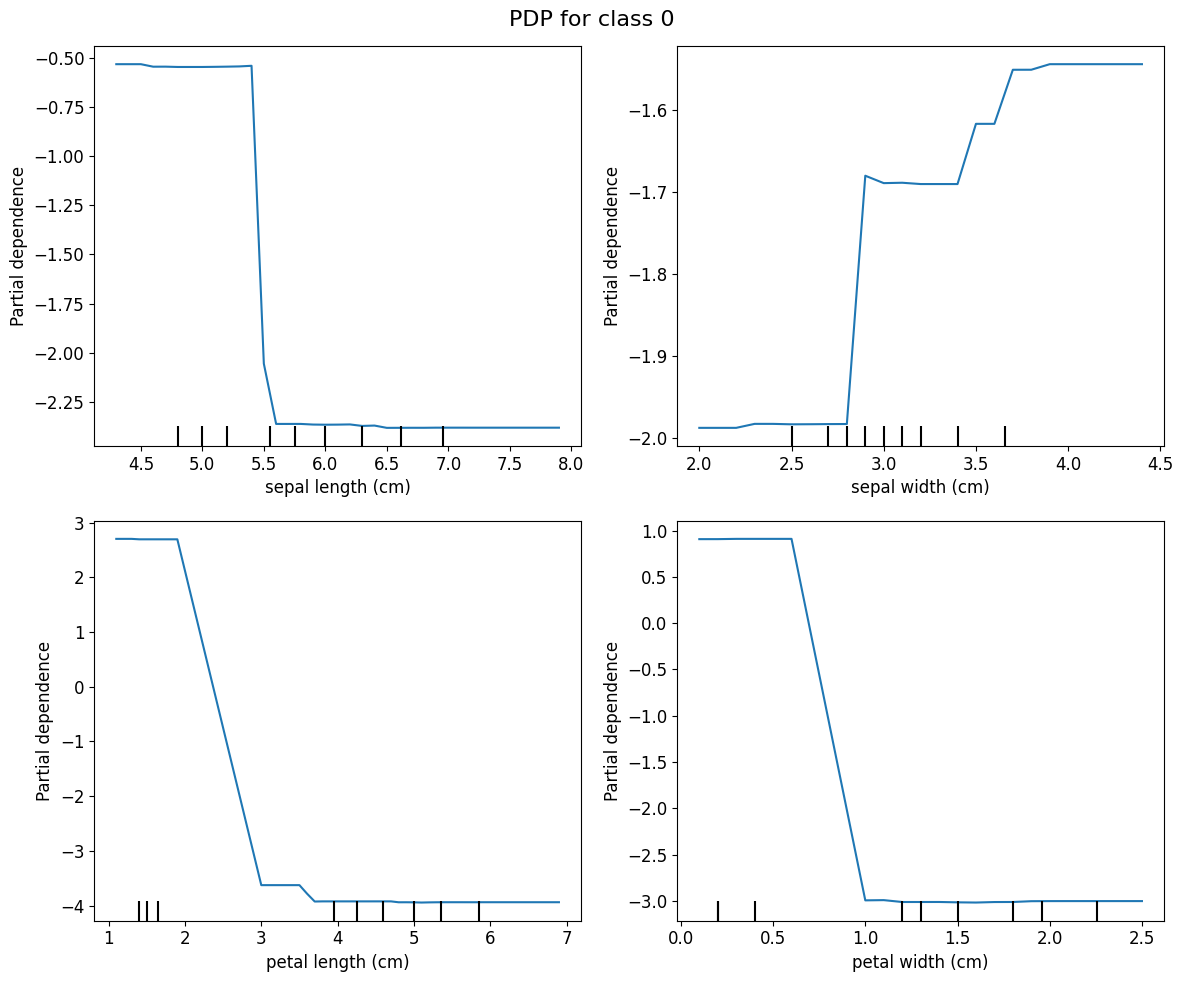

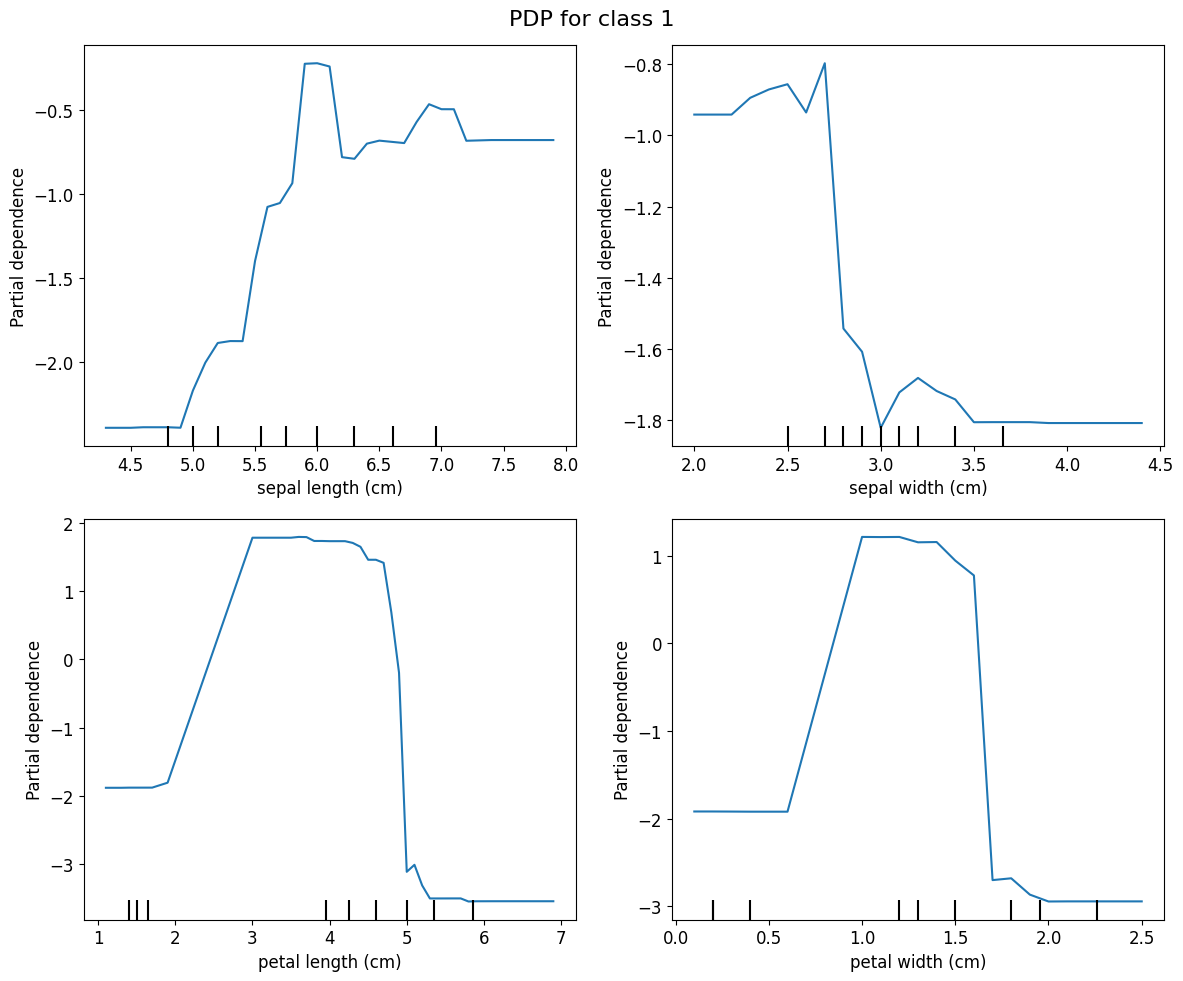

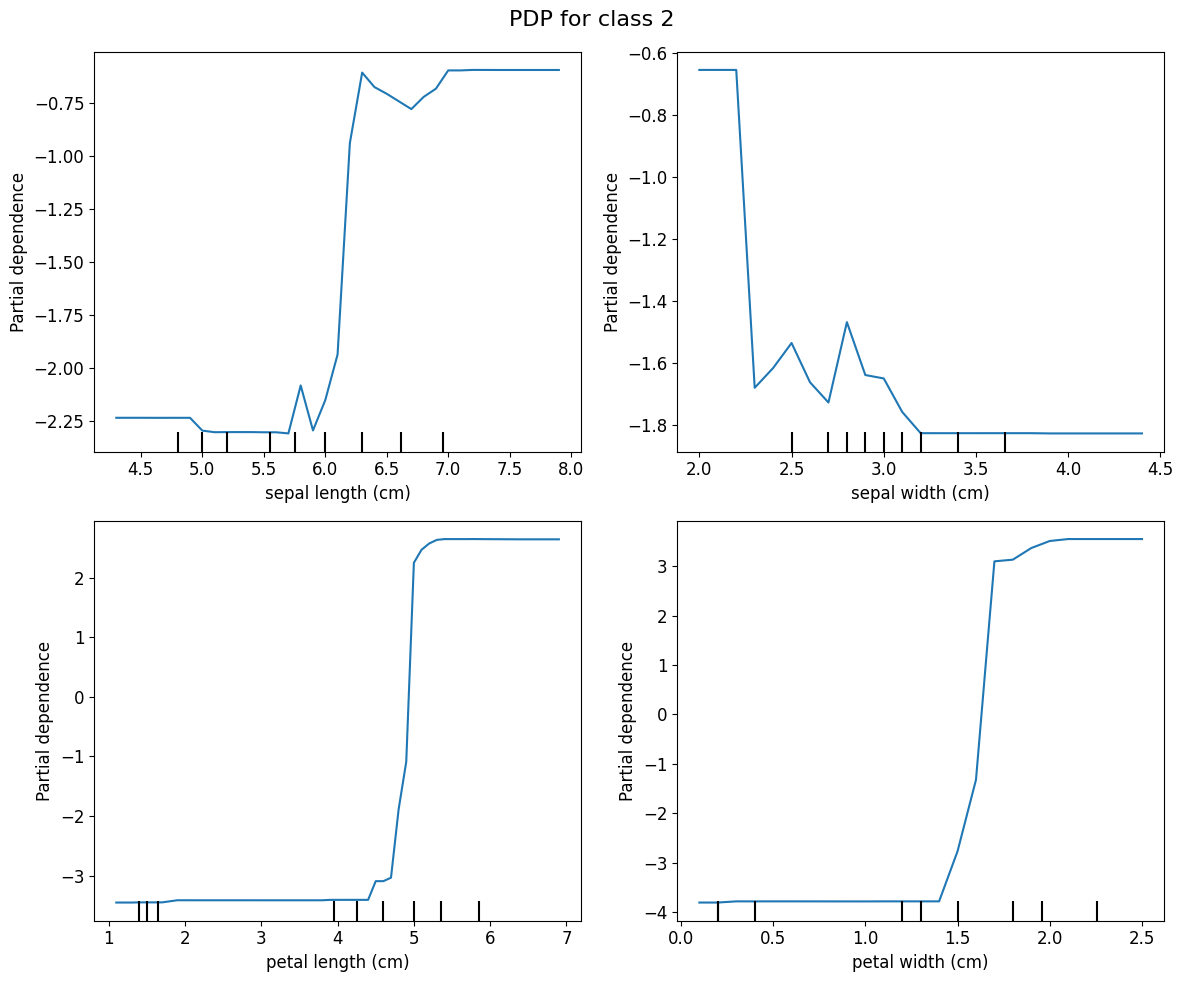

In [ ]:
for target_class in gbm_model.classes_:
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.ravel()

    for i in range(4):
        PartialDependenceDisplay.from_estimator(
            gbm_model,
            X_train,
            features=[i],
            target=target_class,
            ax=axes[i],
            feature_names=iris.feature_names
        )

    fig.suptitle(f"PDP for class {target_class}", fontsize=16)
    plt.tight_layout()
    plt.show()

## 🎓 6. 주요 개념 정리
#### 의사 잔차 (Pseudo-Residual)

- 손실 함수의 음의 그래디언트로 계산
- 다음 모델이 학습할 목표값 역할
- 회귀에서는 실제 잔차와 유사

#### 스텝 크기 (Step Size)

- 각 부스팅 라운드에서 모델이 얼마나 업데이트될지 결정
- 선택적(Line Search)으로 계산하거나 고정값 사용
- 작을수록 더 정확하지만 느림

#### 조기 종료 (Early Stopping)

- 검증 성능이 개선되지 않으면 학습 중단
- 과적합 방지 및 계산 시간 단축
- n_iter_no_change 파라미터로 조절